# Step1: Importing libraries

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

# Step2: Read car image and convert to RGB

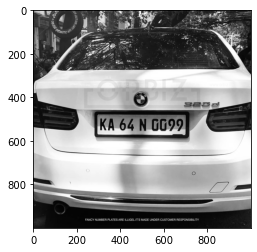

In [67]:
img = cv2.imread('D://Images/car_2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Step3: Reduce noise and detect edges  

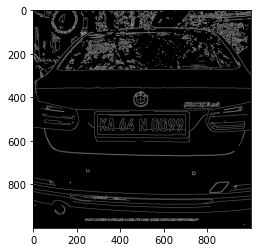

In [68]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Step4: Detecting the object (Number plate) using contours

In [69]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [70]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [71]:
location

array([[[295, 484]],

       [[298, 570]],

       [[699, 570]],

       [[696, 480]]], dtype=int32)

In [72]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

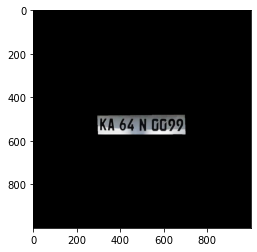

In [73]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [74]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

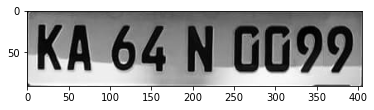

In [75]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [76]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 5], [405, 5], [405, 90], [3, 90]], 'KA 64 N 0099', 0.543025591348414)]

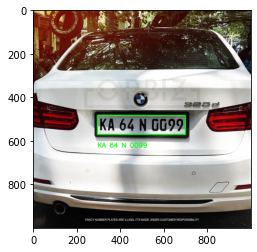

In [77]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [78]:
text

'KA 64 N 0099'